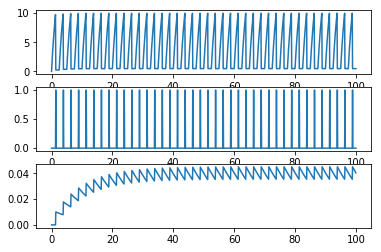

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def update(V, I, VT, dt, tau, ref, tau_ref):
    if ref > 0:
        ref -= dt
        return V, 0, ref
    else:
        Vnew = V + (I-V)*dt/tau
        if Vnew > VT:
            Vnew -= VT
            return Vnew, 1, tau_ref
        else:
            return Vnew, 0, 0

# Compute discretized exponential decay convolution
def approxDelayConv(data, TAU, DT):
    N = data.shape[0]
    alpha = DT / TAU
    beta = 1-alpha
    
    rez = np.zeros(N+1)
    for i in range(1, N+1):
        rez[i] = rez[i-1]*beta + data[i-1]*alpha

    return rez[1:]

I = 20
VT = 10
dt = 0.1
tau = 2
tau_ref = 1
T = 100
NT = int(T / dt)+1
t_list = np.linspace(0, T, NT)

ref = 0
V = np.zeros(NT)
sp = np.zeros(NT)

for i in range(1, NT):
    V[i], sp[i], ref  = update(V[i-1], I, VT, dt, tau, ref, tau_ref)
    
sp_rate = approxDelayConv(sp, 10, dt)

fig, ax = plt.subplots(nrows=3)
ax[0].plot(t_list, V)
ax[1].plot(t_list, sp)
ax[2].plot(t_list, sp_rate)
plt.show()

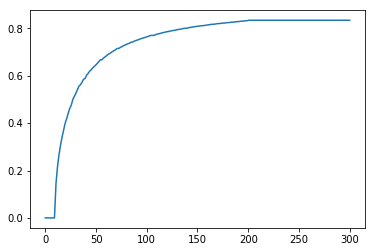

In [33]:
T = 1000
NT = int(T / dt)+1
t_list = np.linspace(0, T, NT)

N_I = 200
rate = np.zeros(N_I)
I_lst = np.linspace(0, 30*VT, N_I)


for iInp in range(N_I):
    V = np.zeros(NT)
    sp = np.zeros(NT)
    ref = 0
    for iTime in range(1, NT):
        V[iTime], sp[iTime], ref  = update(V[iTime-1], I_lst[iInp], VT, dt, tau, ref, tau_ref)
    rate[iInp] = np.sum(sp) / T
    
plt.figure()
plt.plot(I_lst, rate)
plt.show()

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


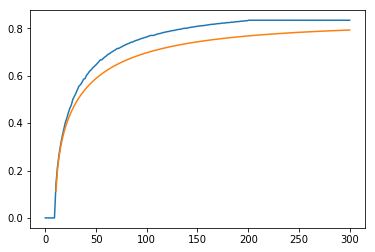

In [72]:
fguess = lambda I: 0.82 * (1 - np.exp(-(I-10)**0.5 / 5))

plt.figure()
plt.plot(I_lst, rate)
plt.plot(I_lst, fguess(I_lst))
plt.show()